In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine

In [4]:
def generate_continuous_wieners(
    T: float, N: int, num_simulations: int
) -> tuple[np.ndarray, np.ndarray]:
    """
    Generate trajectories of continuous Wiener processes.

    Parameters:
    T (float): Total time.
    N (int): Number of time steps.
    num_simulations (int): Number of Wiener process simulations.

    Returns:
    tuple[np.ndarray, np.ndarray]: Time array, array of Wiener process trajectories.

    Example:
    --------
    >>> t, all_W = generate_continuous_wieners(T = 1, N = 1000, num_simulations = 50)
    This will generate 50 trajectories of Wiener processes with 1000 time steps each for a total time of 1.
    """
    dt = T / N
    t = np.linspace(0, T, N + 1)
    dW = np.sqrt(dt) * np.random.randn(num_simulations, N)
    W = np.cumsum(dW, axis=1)
    return t, np.insert(W, 0, 0, axis=1)

In [5]:
# pierwsze prawo
def time_above_zero(W: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Calculate the time spent above zero for each Wiener process trajectory.

    Parameters:
    W (np.ndarray): Array of Wiener process trajectories.
    t (np.ndarray): Time array.

    Returns:
    np.ndarray: Array of time spent above zero for each Wiener process.
    Example:
    --------
    >>> above_zero_times = time_above_zero(W, t)
    This will calculate the time spent above zero for each Wiener process trajectory,
    where W is the array of Wiener process trajectories and t is the corresponding time array.
    """
    above_zero_times = []
    for w in W:
        above_zero_indices = np.where(w > 0)[0]
        if len(above_zero_indices) > 0:
            above_zero_times.append(
                t[above_zero_indices[-1]] - t[above_zero_indices[0]]
            )
        else:
            above_zero_times.append(0)
    return np.array(above_zero_times)

In [6]:
# drugie prawo
def last_crossing_time(W: np.ndarray, t: np.ndarray) -> np.ndarray:
    """
    Calculate the last crossing time where Wiener process equals 0 for each simulation.

    Parameters:
    W (np.ndarray): Array of Wiener process trajectories.
    t (np.ndarray): Time array.

    Returns:
    np.ndarray: Array of last crossing times where Wiener process equals 0 for each simulation.
    Example:
    --------
    >>> last_zero_times = last_crossing_time(W, t)
    This will calculate the last crossing time where Wiener process equals 0 for each simulation,
    where W is the array of Wiener process trajectories and t is the corresponding time array.
    """
    last_zero_times = np.zeros(len(W))

    for i, w in enumerate(W):
        sign_changes = np.where(np.diff(np.sign(w)) != 0)[0]

        if len(sign_changes) == 0:
            last_zero_times[i] = None
        else:
            last_zero_index = sign_changes[-1]
            last_zero_times[i] = np.interp(
                0,
                w[last_zero_index : last_zero_index + 2],
                t[last_zero_index : last_zero_index + 2],
            )

    return last_zero_times

In [ ]:
def get_theoretical_density(t: np.ndarray) -> np.ndarray:
    """
    Calculate the theoretical density of the arcsin distribution.

    Parameters:
    t (np.ndarray): Time array.

    Returns:
    np.ndarray: Theoretical density of the last crossing time where Wiener process equals 0.
    Example:
    --------
    >>> theoretical_density = get_theoretical_density(t)
    This will calculate the theoretical density of the arcsin distribution.
    where t is the time array.
    """
    return 1 / (np.pi * np.sqrt(t * (1 - t)))

In [7]:
num_simulations = 1000
T = 1
steps = 1000
t_continuous, all_W_continuous = generate_continuous_wieners(T, steps, num_simulations)

In [ ]:
x = np.arange(0.01, 1, 0.01)
pdf = arcsine.pdf(x=x)
cdf = arcsine.cdf(x=x)

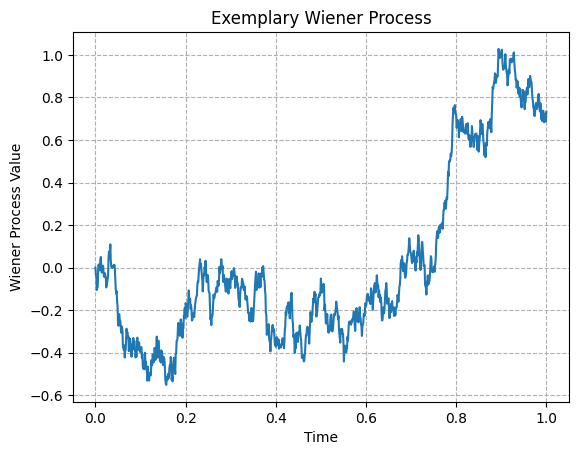

In [12]:
# Exemplary trajectory
plt.plot(t_continuous, all_W_continuous[0])
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Exemplary Wiener Trajectory")
plt.grid(True, linestyle="--")
plt.show()

In [2]:
# trzecie prawo
max_indices = np.argmax(all_W_continuous, axis=1)
max_times = t_continuous[max_indices]

NameError: name 'all_W_continuous' is not defined